In [28]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [29]:
def calculate_readout_noise(reset_image, read_images):

    difference_images = [read_image - reset_image for read_image in read_images]
    
    std_differences = [np.std(diff_image) for diff_image in difference_images]
    
    avg_std_difference = np.mean(std_differences)
    
    readout_noise_rms = avg_std_difference / np.sqrt(2)
    
    return readout_noise_rms

In [37]:
number_of_files = 4  
fits_files = [f'ramp_mode_single_ended/1ramp_1reset_4read/Frame_R0001_M0001_N000{i+1}.fits' for i in range(number_of_files)]
reset_image_path = fits_files[0]
read_image_paths = fits_files[1:4]

reset_image_data = fits.getdata(fits_files[0])
read_image_data = [fits.getdata(path) for path in read_image_paths]

readout_noise = calculate_readout_noise(reset_image_data, read_image_data)
print(f"Readout Noise (RMS): {readout_noise} ADU")

Readout Noise (RMS): 21662.261961151125 ADU


In [36]:
def calculate_readout_noise_single_frame(image_data):
    # Calculate the standard deviation of the pixel values
    std_pixel_value = np.std(image_data)
    
    # Readout noise is the RMS value, which is the standard deviation
    readout_noise_rms = std_pixel_value
    
    return readout_noise_rms


image_path = f'ramp_mode_single_ended/1ramp_1reset_4read/Frame_R0001_M0001_N0004.fits'

# Load the image using astropy
image_data = fits.getdata(image_path)

# Calculate the readout noise
readout_noise = calculate_readout_noise_single_frame(image_data)
print(f"Readout Noise (RMS): {readout_noise} ADU")

Readout Noise (RMS): 3060.1637251517714 ADU


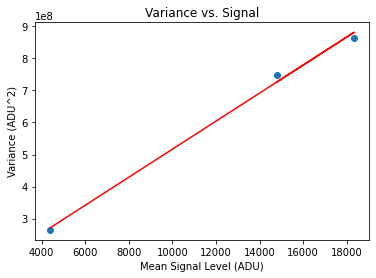

Conversion Gain: 43702.843723062375 ADU/e
Read Noise: 79758221.091045 ADU^2


In [43]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

def calculate_mean_variance(reset_image, read_images):
    """
    Calculate the mean and variance of pixel values for a series of flat field images.
    
    Parameters:
    reset_image (numpy array): 2D array of pixel values from the reset frame.
    read_images (list of numpy arrays): List of 2D arrays of pixel values from the read frames.
    
    Returns:
    tuple: Two lists containing the mean and variance of pixel values for each image.
    """
    means = []
    variances = []
    
    for read_image in read_images:
        difference_image = read_image - reset_image
        means.append(np.mean(difference_image))
        variances.append(np.var(difference_image))
    
    return means, variances

def plot_variance_vs_signal(means, variances):
    """
    Plot the variance vs. signal and determine the conversion gain and read noise.
    
    Parameters:
    means (list of float): List of mean signal levels.
    variances (list of float): List of variances of the signal.
    
    Returns:
    tuple: Conversion gain (slope) and read noise (intercept).
    """
    plt.figure()
    plt.plot(means, variances, 'o')
    plt.xlabel('Mean Signal Level (ADU)')
    plt.ylabel('Variance (ADU^2)')
    plt.title('Variance vs. Signal')
    
    # Fit a linear model to the data
    fit = np.polyfit(means, variances, 1)
    gain = fit[0]
    read_noise = fit[1]
    
    # Plot the fitted line
    plt.plot(means, np.polyval(fit, means), 'r-')
    plt.show()
    
    return gain, read_noise

number_of_files = 4 
fits_files = [f'ramp_mode_single_ended/4ramp_1reset_1read/Frame_R000{i+1}_M0001_N0001.fits' for i in range(number_of_files)]
reset_image_path = fits_files[0]
read_image_paths = fits_files[1:4]

reset_image_data = fits.getdata(fits_files[0])
read_image_data = [fits.getdata(path) for path in read_image_paths]

# Calculate the mean and variance for each read frame
means, variances = calculate_mean_variance(reset_image_data, read_image_data)

# Plot the variance vs. signal and determine the conversion gain and read noise
gain, read_noise = plot_variance_vs_signal(means, variances)
print(f"Conversion Gain: {gain} ADU/e")
print(f"Read Noise: {read_noise} ADU^2")


In [59]:
def calculate_readout_noise_cds(reset_image, read_image):

    diff_image = read_image - reset_image
    
 
    std_diff = np.std(diff_image)
    med = np.median(std_diff)
    
    readout_noise_rms = med/ np.sqrt(2)
    
    return readout_noise_rms

reset_image_path = f'cds/Frame_R01_M01_N01.fits'
read_image_path = f'cds/Frame_R01_M01_N02.fits'

reset_image_data = fits.getdata(reset_image_path)
read_image_data = fits.getdata(read_image_path)

readout_noise_cds = calculate_readout_noise_cds(reset_image_data, read_image_data)
print(f"Readout Noise (median) for CDS: {readout_noise_cds} ADU")

Readout Noise (median) for CDS: 20594.255103226544 ADU


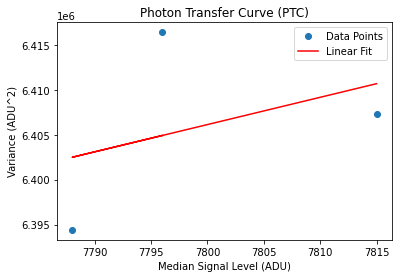

Conversion Gain: 303.55330045819886 ADU/e
Read Noise (ADU^2): 4038415.7530813953
Readout Noise (RMS) in ADU: 2009.5809894307308
Readout Noise (RMS) in Electrons: 6.6201915327468575


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def calculate_median_variance(image_paths):
    medians = []
    variances = []
    
    for path in image_paths:
        image_data = fits.getdata(path)
        medians.append(np.median(image_data))
        variances.append(np.var(image_data))
    
    return medians, variances

def plot_ptc(medians, variances):
    plt.figure()
    plt.plot(medians, variances, 'o', label='Data Points')
    plt.xlabel('Median Signal Level (ADU)')
    plt.ylabel('Variance (ADU^2)')
    plt.title('Photon Transfer Curve (PTC)')
    
    # Fit a linear model to the data
    fit = np.polyfit(medians, variances, 1)
    gain = fit[0]
    read_noise_adusq = fit[1]
    
    # Plot the fitted line
    plt.plot(medians, np.polyval(fit, medians), 'r-', label='Linear Fit')
    plt.legend()
    plt.show()
    
    return gain, read_noise_adusq

def calculate_readout_noise(read_noise_adusq, gain):
    read_noise_adu = np.sqrt(read_noise_adusq)
    read_noise_electrons = read_noise_adu / gain
    return read_noise_adu, read_noise_electrons

number_of_files = 3 
flat_field_image_paths = [f'ramp_mode_single_ended/4ramp_1reset_1read/Frame_R000{i+2}_M0001_N0001.fits' 
                          for i in range(number_of_files)]

# Calculate the median and variance for each flat field image
medians, variances = calculate_median_variance(flat_field_image_paths)

# Plot the PTC and determine the gain and read noise
gain, read_noise_adusq = plot_ptc(medians, variances)
print(f"Conversion Gain: {gain} ADU/e")
print(f"Read Noise (ADU^2): {read_noise_adusq}")

# Calculate the readout noise in ADU and electrons
read_noise_adu, read_noise_electrons = calculate_readout_noise(read_noise_adusq, gain)
print(f"Readout Noise (RMS) in ADU: {read_noise_adu}")
print(f"Readout Noise (RMS) in Electrons: {read_noise_electrons}")

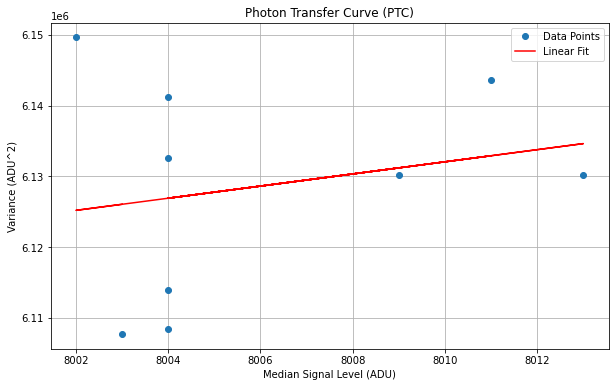

Conversion Gain: 858.2197171852206 ADU/e
Read Noise (ADU^2): -742292.7099476135
Readout Noise (RMS) in ADU: 861.5641066964278
Readout Noise (RMS) in Electrons: 1.0038968919546338


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def calculate_median_variance(image_paths):
    medians = []
    variances = []
    
    for path in image_paths:
        image_data = fits.getdata(path)
        medians.append(np.median(image_data))
        variances.append(np.var(image_data))
    
    return medians, variances

def plot_ptc(medians, variances):
    plt.figure(figsize=(10, 6))
    plt.plot(medians, variances, 'o', label='Data Points')
    plt.xlabel('Median Signal Level (ADU)')
    plt.ylabel('Variance (ADU^2)')
    plt.title('Photon Transfer Curve (PTC)')
    
    # Fit a linear model to the data
    fit = np.polyfit(medians, variances, 1)
    gain = fit[0]
    read_noise_adusq = fit[1]
    
    # Plot the fitted line
    plt.plot(medians, np.polyval(fit, medians), 'r-', label='Linear Fit')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return gain, read_noise_adusq

def calculate_readout_noise(read_noise_adusq, gain):
    read_noise_adu = np.sqrt(np.abs(read_noise_adusq))  # Use absolute value to avoid NaN
    read_noise_electrons = read_noise_adu / gain
    return read_noise_adu, read_noise_electrons

# File paths for your images
flat_field_image_paths = [f'ramp_mode_single_ended/10ramp_1reset_1read_test/Frame_R{str(i).zfill(4)}_M0001_N0001.fits' 
                          for i in range(2, 11)]

# Calculate the median and variance for each flat field image
medians, variances = calculate_median_variance(flat_field_image_paths)

# Plot the PTC and determine the gain and read noise
gain, read_noise_adusq = plot_ptc(medians, variances)
print(f"Conversion Gain: {gain} ADU/e")
print(f"Read Noise (ADU^2): {read_noise_adusq}")

# Calculate the readout noise in ADU and electrons
read_noise_adu, read_noise_electrons = calculate_readout_noise(read_noise_adusq, gain)
print(f"Readout Noise (RMS) in ADU: {read_noise_adu}")
print(f"Readout Noise (RMS) in Electrons: {read_noise_electrons}")


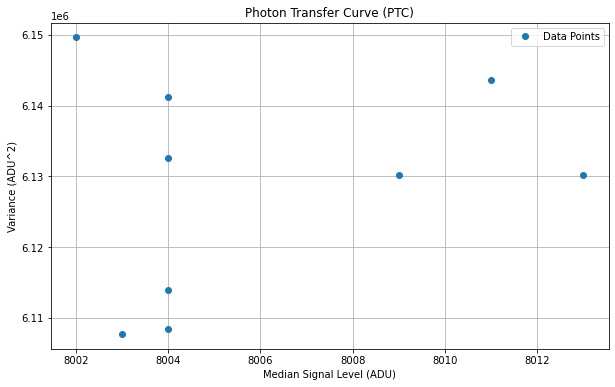

In [4]:
# Data visualization code to plot medians and variances
plt.figure(figsize=(10, 6))
plt.plot(medians, variances, 'o', label='Data Points')
plt.xlabel('Median Signal Level (ADU)')
plt.ylabel('Variance (ADU^2)')
plt.title('Photon Transfer Curve (PTC)')
plt.legend()
plt.grid(True)
plt.show()

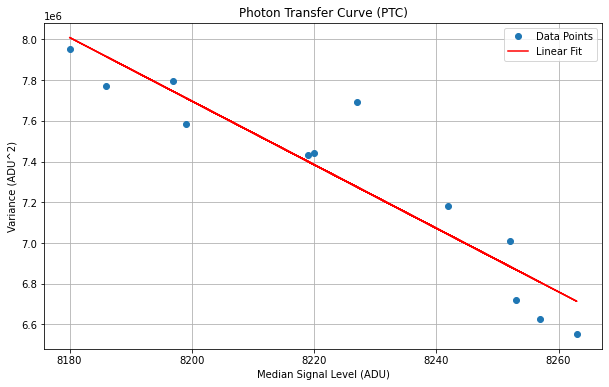

Conversion Gain: -15618.014292566357 ADU/e
Read Noise (ADU^2): 135764812.91882196
Readout Noise (RMS) in ADU: 11651.815863582035
Readout Noise (RMS) in Electrons: -0.7460497631333263


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def calculate_median_variance(image_paths):
    medians = []
    variances = []
    
    for path in image_paths:
        image_data = fits.getdata(path)
        medians.append(np.median(image_data))
        variances.append(np.var(image_data))
    
    return medians, variances

def plot_ptc(medians, variances):
    plt.figure(figsize=(10, 6))
    plt.plot(medians, variances, 'o', label='Data Points')
    plt.xlabel('Median Signal Level (ADU)')
    plt.ylabel('Variance (ADU^2)')
    plt.title('Photon Transfer Curve (PTC)')
    
    # Fit a linear model to the data
    fit = np.polyfit(medians, variances, 1)
    gain = fit[0]
    read_noise_adusq = fit[1]
    
    # Plot the fitted line
    plt.plot(medians, np.polyval(fit, medians), 'r-', label='Linear Fit')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return gain, read_noise_adusq

def calculate_readout_noise(read_noise_adusq, gain):
    read_noise_adu = np.sqrt(np.abs(read_noise_adusq))  # Use absolute value to avoid NaN
    read_noise_electrons = read_noise_adu / gain
    return read_noise_adu, read_noise_electrons

# File paths for your images (excluding reset frames)
flat_field_image_paths = [
    f'ramp_mode_single_ended/4ramp_1reset_4read_test/Frame_R{str(ramp).zfill(4)}_M0001_N000{str(read).zfill(1)}.fits' 
    for ramp in range(1, 5) for read in range(2, 5)  # Reads 2, 3, 4 for each ramp
]

# Calculate the median and variance for each flat field image
medians, variances = calculate_median_variance(flat_field_image_paths)

# Plot the PTC and determine the gain and read noise
gain, read_noise_adusq = plot_ptc(medians, variances)
print(f"Conversion Gain: {gain} ADU/e")
print(f"Read Noise (ADU^2): {read_noise_adusq}")

# Calculate the readout noise in ADU and electrons
read_noise_adu, read_noise_electrons = calculate_readout_noise(read_noise_adusq, gain)
print(f"Readout Noise (RMS) in ADU: {read_noise_adu}")
print(f"Readout Noise (RMS) in Electrons: {read_noise_electrons}")

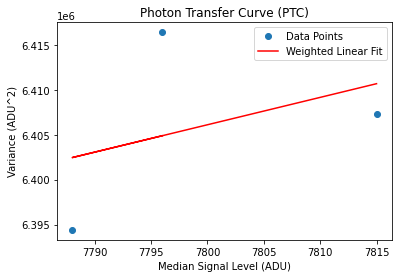

Conversion Gain: 304.850619426827 ADU/e
Read Noise (ADU^2): 4028275.3463220336
Readout Noise (RMS) in ADU: 2007.0563884261035
Readout Noise (RMS) in Electrons: 6.583737281556862


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def calculate_median_variance(image_paths):
    medians = []
    variances = []
    
    for path in image_paths:
        image_data = fits.getdata(path)
        medians.append(np.median(image_data))
        variances.append(np.var(image_data))
    
    return medians, variances

def plot_ptc(medians, variances):
    plt.figure()
    plt.plot(medians, variances, 'o', label='Data Points')
    plt.xlabel('Median Signal Level (ADU)')
    plt.ylabel('Variance (ADU^2)')
    plt.title('Photon Transfer Curve (PTC)')
    
    # Fit a weighted linear model to the data
    weights = 1 / np.array(variances)  # Example weights, you can adjust based on your data
    fit = np.polyfit(medians, variances, 1, w=weights)
    gain = fit[0]
    read_noise_adusq = fit[1]
    
    # Plot the fitted line
    plt.plot(medians, np.polyval(fit, medians), 'r-', label='Weighted Linear Fit')
    plt.legend()
    plt.show()
    
    return gain, read_noise_adusq

def calculate_readout_noise(read_noise_adusq, gain):
    read_noise_adu = np.sqrt(read_noise_adusq)
    read_noise_electrons = read_noise_adu / gain
    return read_noise_adu, read_noise_electrons

number_of_files = 3 
flat_field_image_paths = [f'ramp_mode_single_ended/10ramp_1reset_1read_test/Frame_R{str(i).zfill(4)}_M0001_N0001.fits' 
                          for i in range(number_of_files)]

# Calculate the median and variance for each flat field image
medians, variances = calculate_median_variance(flat_field_image_paths)

# Plot the PTC and determine the gain and read noise
gain, read_noise_adusq = plot_ptc(medians, variances)
print(f"Conversion Gain: {gain} ADU/e")
print(f"Read Noise (ADU^2): {read_noise_adusq}")

# Calculate the readout noise in ADU and electrons
read_noise_adu, read_noise_electrons = calculate_readout_noise(read_noise_adusq, gain)
print(f"Readout Noise (RMS) in ADU: {read_noise_adu}")
print(f"Readout Noise (RMS) in Electrons: {read_noise_electrons}")


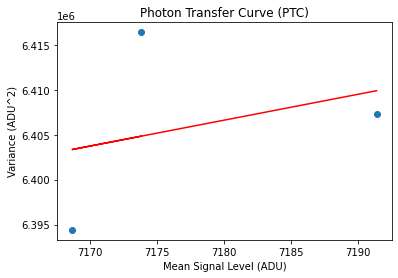

Gain: 288.5112113730972 electrons/ADU


In [64]:
def calculate_mean_variance(image_paths):
   
    means = []
    variances = []
    
    for path in image_paths:
        image_data = fits.getdata(path)
        means.append(np.mean(image_data))
        variances.append(np.var(image_data))
    
    return means, variances

def plot_ptc(means, variances):
    plt.figure()
    plt.plot(means, variances, 'o')
    plt.xlabel('Mean Signal Level (ADU)')
    plt.ylabel('Variance (ADU^2)')
    plt.title('Photon Transfer Curve (PTC)')
    
    fit = np.polyfit(means, variances, 1)
    gain = fit[0]
    
    plt.plot(means, np.polyval(fit, means), 'r-')
    plt.show()
    
    return gain

# Example usage

number_of_files = 3 
flat_field_image_paths = [f'ramp_mode_single_ended/4ramp_1reset_1read/Frame_R000{i+2}_M0001_N0001.fits' 
                          for i in range(number_of_files)]
    
means, variances = calculate_mean_variance(flat_field_image_paths)

# Plot the PTC and determine the gain
gain = plot_ptc(means, variances)
print(f"Gain: {gain} electrons/ADU")

In [2]:
# fowlwer destructive non destructive differece
# median subtraction
# Fast Fourier Transform
# Channel Subtraction
# well capacity